In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['axes.formatter.limits'] = [-3,3]
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2 Linear regression with one variable

## 2.1 Plotting the Data

In [2]:
data = np.loadtxt('ex1_octave/ex1data1.txt', delimiter=',')
x, y = data[:,0], data[:,1]
m = len(y)

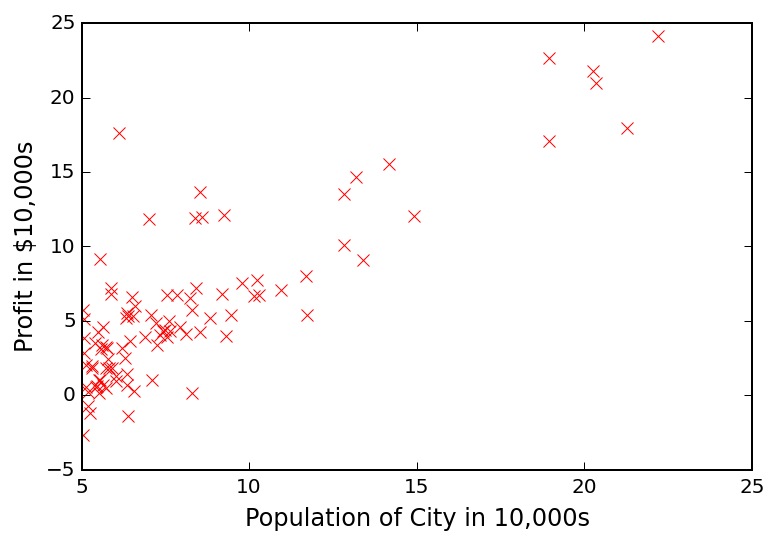

In [3]:
plt.plot(x, y, 'x', color='r')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s')

## 2.2 Gradient Descent

In [4]:
def computeCost(X, y, theta):
    
    dt = np.dot(X, theta) - y
    
    return np.dot(dt, dt) / 2 / m

In [5]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    # initialize some numbers #
    
    # number of training samples
    m = len(y)
    
    # cost function history
    J_history = np.zeros(num_iters)
    
    # start loop
    theta_new = theta.copy()
    for ii in range(num_iters):
        
        # update theta
        theta_new -= alpha * np.dot(X.T, (np.dot(X,theta_new) - y)) / m
        
        # store cost function
        J_history[ii] = computeCost(X, y, theta_new)
        
    return theta_new, J_history      

In [6]:
# initialize data array
X = np.ones((m, 2))
X[:,1] = data[:,0]

# initalize model
theta = np.zeros(2)

### 2.2.3 Computing the cost $J(\theta)$

In [7]:
# compute the cost function for theta = zeros
computeCost(X, y, theta)

32.072733877455676

### 2.2.4 Gradient descent

In [8]:
# algorithm parameters
alpha = 0.01
iterations = 1500

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [9]:
theta_new

array([-3.63029144,  1.16636235])

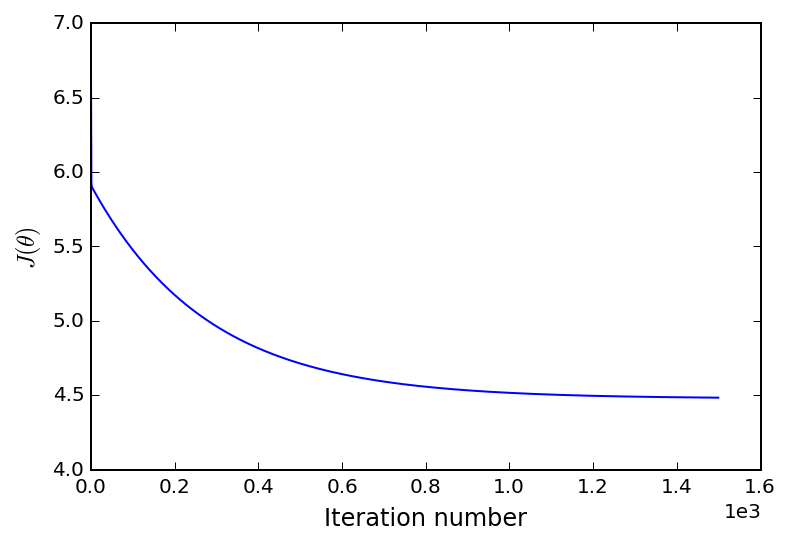

In [10]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')

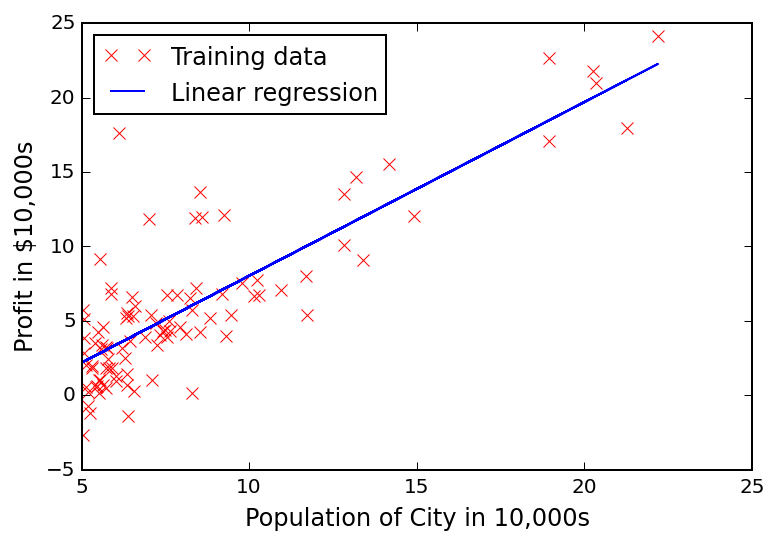

In [11]:
# plot data along with Linear regression
plt.plot(x, y, 'x', color='r', label='Training data')
plt.plot(x, np.dot(X, theta_new), label='Linear regression', color='b')
plt.xlabel(r'Population of City in 10,000s')
plt.ylabel(r'Profit in $10,000s')
plt.legend(loc='best')

## 2.4 Visualizing $J(\theta)$

In [12]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J values
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

# fill in J values
for ii, t0 in enumerate(theta0_vals):
    for jj, t1 in enumerate(theta1_vals):
        t = np.array([t0, t1])
        J_vals[ii,jj] = computeCost(X, y, t)

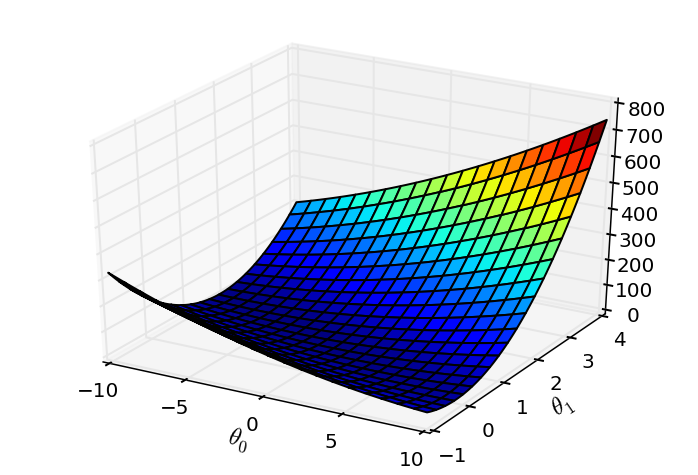

In [13]:
# make Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')

T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

surf = ax.plot_surface(T0, T1, J_vals.T, cmap='jet', rstride=5, 
                       cstride=5, antialiased=True)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')

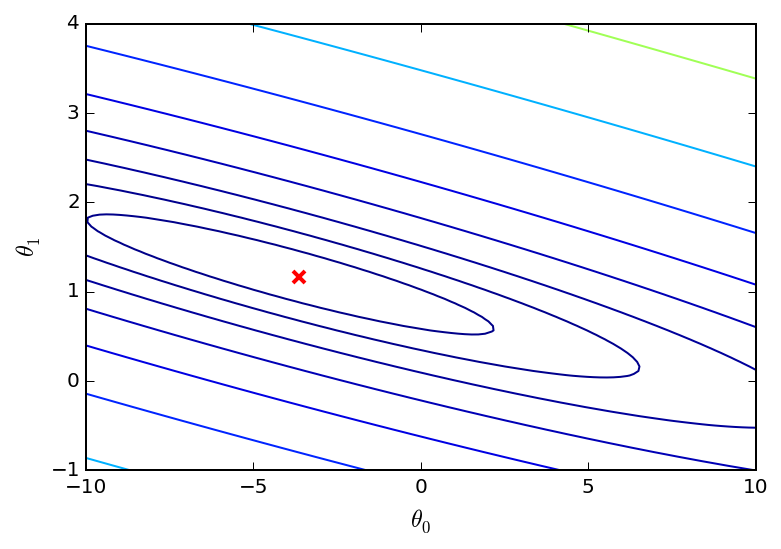

In [14]:
# make contour plot
plt.contour(T0, T1, J_vals.T, np.logspace(-2, 3, 20))
plt.plot(theta_new[0], theta_new[1], 'x', color='r', mew=2)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')

# 3 Linear regression with multiple variables

In [15]:
# read in the data
data = np.loadtxt('ex1_octave/ex1data2.txt', delimiter=',')
x, y = data[:,:-1], data[:,-1]
m = len(y)

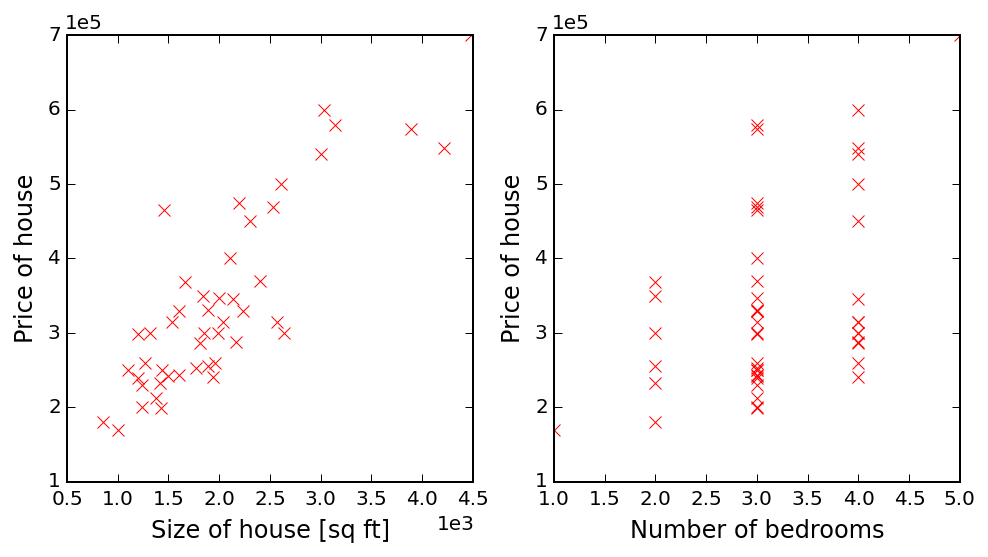

In [16]:
# plot the data
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house')

## 3.1 Feature Normalization

In [17]:
def featureNormalize(X):
    
    # compute mean and standard deviation
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma    

## 3.2 Gradient Descent

In [18]:
# normalize features
X, mu, sigma = featureNormalize(x)

# add mean
X = np.hstack((np.ones((X.shape[0],1)), X))

In [19]:
# gradient descent values
alpha = 0.01
iterations = 400
theta = np.zeros(3)

# run gradient descent
theta_new, J_history = gradientDescent(X, y, theta, alpha, iterations)

In [20]:
theta_new

array([ 334302.06399328,   99411.44947359,    3267.01285407])

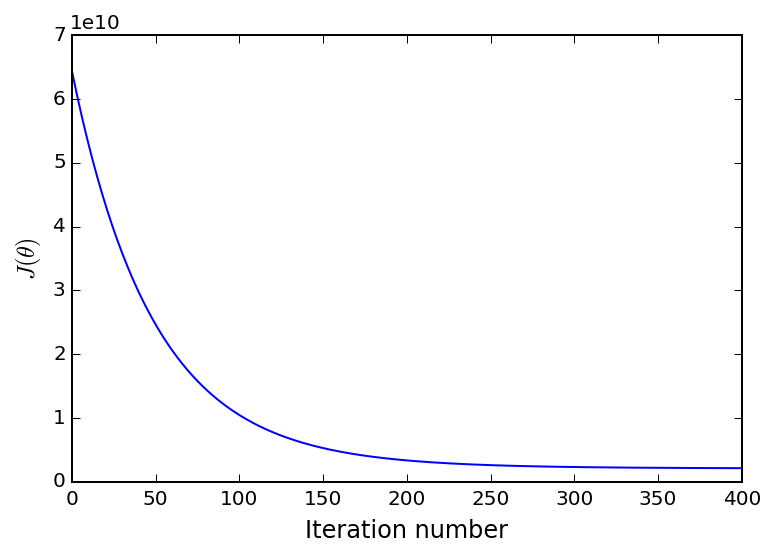

In [21]:
# Plot cost function vs. iteration
plt.plot(J_history)
plt.xlabel(r'Iteration number')
plt.ylabel(r'$J(\theta)$')

In [22]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = (np.array([1650, 3]) - mu) / sigma
vals = np.hstack((np.array([1]), vals))

predict = np.dot(theta_new, vals)
print 'A 1650 sq-ft 3 br house will cost $%6.2f' % predict

A 1650 sq-ft 3 br house will cost $289221.55


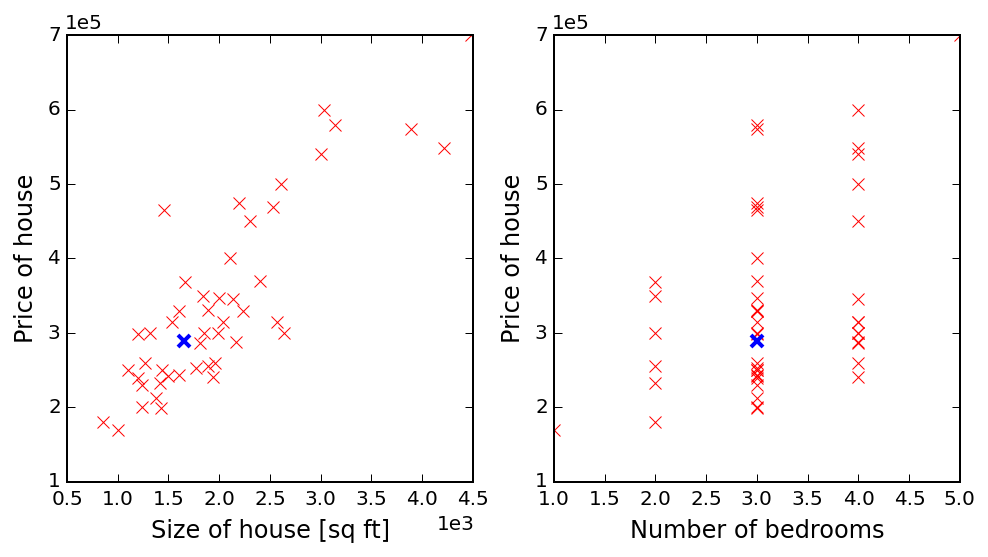

In [23]:
# plot the data and prediction
fit, ax = plt.subplots(1, 2, figsize=(8,4))

ax[0].plot(x[:,0], y, 'x', color='r')
ax[0].plot(1650, predict, 'x', color='b', mew=2)
ax[0].set_xlabel(r'Size of house [sq ft]')
ax[0].set_ylabel(r'Price of house')

ax[1].plot(x[:,1], y, 'x', color='r')
ax[1].plot(3, predict, 'x', color='b', mew=2)
ax[1].set_xlabel(r'Number of bedrooms')
ax[1].set_ylabel(r'Price of house')

### 3.2.1 Selecting Learning Rates

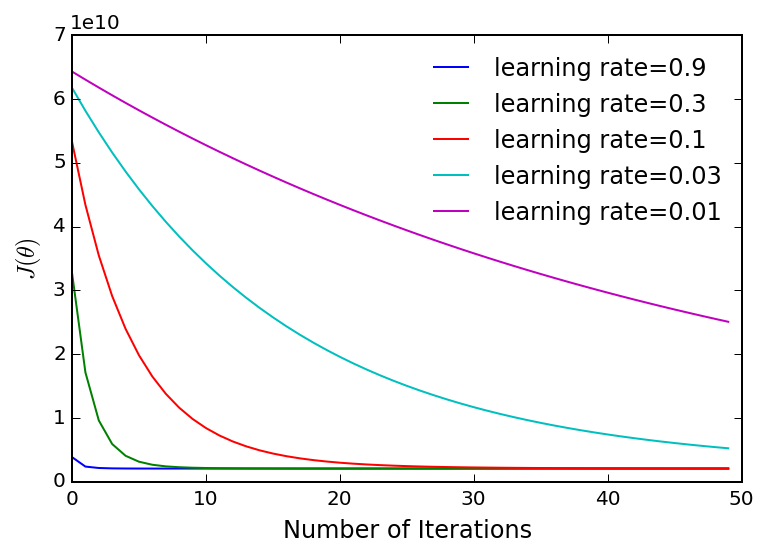

In [24]:
alphas = [0.9, 0.3, 0.1, 0.03, 0.01]
for alpha in alphas:
    theta_new, J_history = gradientDescent(X, y, theta, alpha, 50)
    plt.plot(J_history, label='learning rate={0}'.format(alpha))

plt.ylabel(r'$J(\theta)$')
plt.xlabel(r'Number of Iterations')
plt.legend(loc='best', frameon=False)
    

## 3.2 Normal Equations

In [25]:
def normalEqn(X, y):
    
    inv_term = np.linalg.inv(np.dot(X.T, X))
    theta = np.dot(inv_term, np.dot(X.T, y))
    
    return theta

In [26]:
# re-compute X with out normalization
X = np.hstack((np.ones((x.shape[0],1)), x))

# get solution with normal equation
theta_norm = normalEqn(X, y)

In [27]:
# Estimate the price of a 1650 sq-ft, 3 br house
vals = np.array([1650, 3])
vals = np.hstack((np.array([1]), vals))

# this is the same answer as above if run for more iterations
predict = np.dot(theta_norm, vals)
print 'A 1650 sq-ft 3 br house will cost $%6.2f' % predict

A 1650 sq-ft 3 br house will cost $293081.46
